In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.utils as np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from sklearn import metrics
import seaborn as sns 

# Load the dataset

In [2]:
dataset = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()
    
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

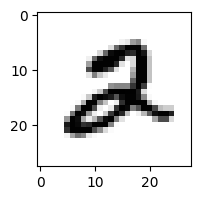

correct number: 2


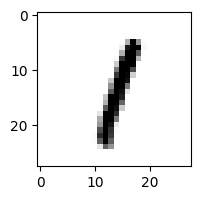

correct number: 1


In [4]:
plot_image(x_train[5])
print("correct number:", y_train[5])

plot_image(x_test[5])
print("correct number:", y_test[5])

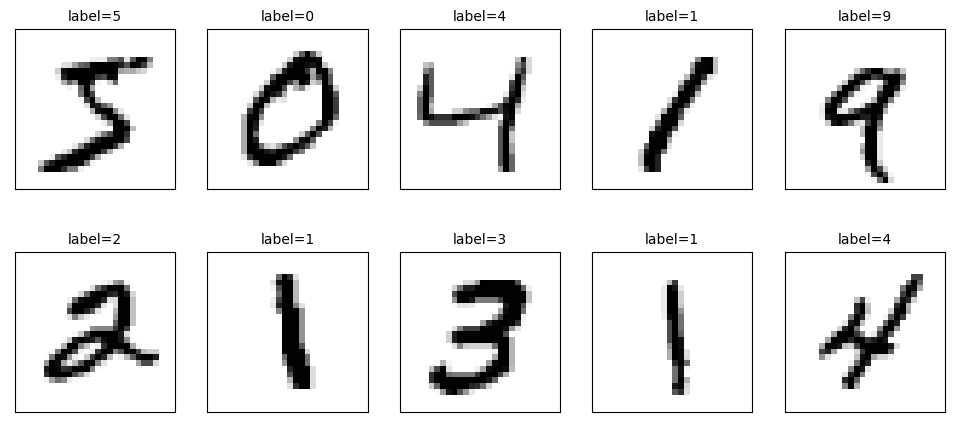

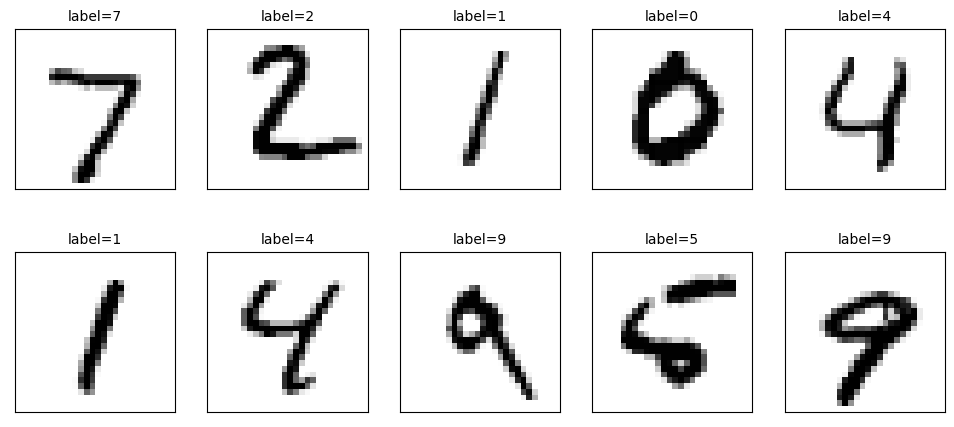

In [5]:
plot_images_labels_prediction(x_train, y_train, [], 0)
plot_images_labels_prediction(x_test, y_test, [], 0)

# Preprocess dataset

In [6]:
# 多加一個顏色的維度 
x_train4D = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test4D = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [7]:
# 將數值縮小到0~1
x_train4D_normalize = x_train4D / 255
x_test4D_normalize = x_test4D / 255

In [8]:
# Performing Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)
print(y_TrainOneHot.shape)
y_TrainOneHot

(60000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# Build CNN Model

In [9]:
model = Sequential()
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # avoid overfitting problem
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected layer
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # There 10 outputs
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

# Training

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 

train_history=model.fit(x=x_train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.1, 
                        epochs=20, batch_size=300,verbose=2)
model.save('my_model.h5')

Epoch 1/20
180/180 - 19s - loss: 0.4691 - accuracy: 0.8551 - val_loss: 0.0848 - val_accuracy: 0.9743 - 19s/epoch - 105ms/step
Epoch 2/20
180/180 - 18s - loss: 0.1354 - accuracy: 0.9594 - val_loss: 0.0611 - val_accuracy: 0.9818 - 18s/epoch - 100ms/step
Epoch 3/20
180/180 - 19s - loss: 0.0971 - accuracy: 0.9707 - val_loss: 0.0441 - val_accuracy: 0.9873 - 19s/epoch - 105ms/step
Epoch 4/20
180/180 - 21s - loss: 0.0799 - accuracy: 0.9756 - val_loss: 0.0416 - val_accuracy: 0.9890 - 21s/epoch - 115ms/step
Epoch 5/20
180/180 - 18s - loss: 0.0695 - accuracy: 0.9792 - val_loss: 0.0393 - val_accuracy: 0.9907 - 18s/epoch - 101ms/step
Epoch 6/20
180/180 - 19s - loss: 0.0618 - accuracy: 0.9814 - val_loss: 0.0334 - val_accuracy: 0.9917 - 19s/epoch - 103ms/step
Epoch 7/20
180/180 - 16s - loss: 0.0522 - accuracy: 0.9842 - val_loss: 0.0344 - val_accuracy: 0.9897 - 16s/epoch - 92ms/step
Epoch 8/20
180/180 - 17s - loss: 0.0505 - accuracy: 0.9844 - val_loss: 0.0316 - val_accuracy: 0.9915 - 17s/epoch - 92ms

In [11]:
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

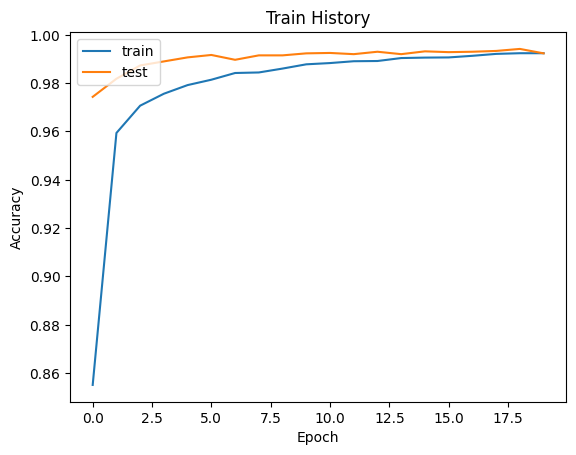

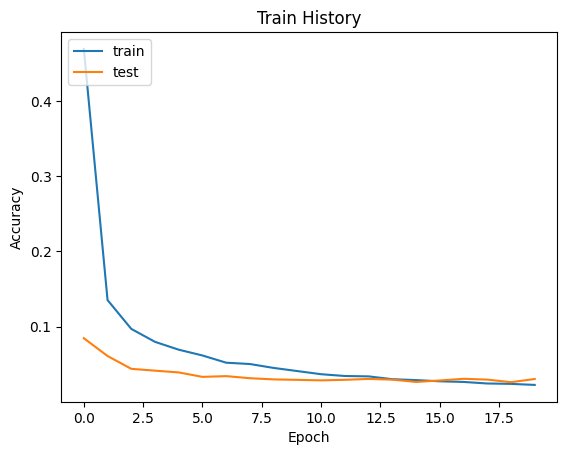

In [12]:
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')

In [13]:
model = load_model('my_model.h5')
loss, accuracy = model.evaluate(x_test4D_normalize, y_TestOneHot)
print("accuracy:", accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.0210 - accuracy: 0.9928
accuracy: 0.9927999973297119


# Confusion Matrix

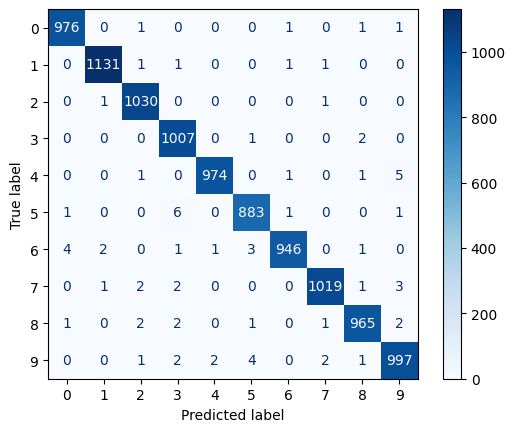

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [14]:
prediction = model(x_test4D_normalize)
prediction = np.argmax(prediction, 1)

actual = np.argmax(y_TestOneHot, 1)

cm = metrics.confusion_matrix(actual, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[i for i in range(10)])
cm_display.plot(cmap = 'Blues')
plt.show()
print(metrics.classification_report(actual, prediction))

# My Own Test

In [25]:
import cv2

path = "C:/Users/Microsoft/Desktop/handwriting recognition/8.jpg"
img = cv2.imread(path)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
#print(img.shape)
image = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image.reshape(1,28,28,1).astype('float32')
#print(image.shape)

y_predict = model([image])
if(np.argmax(y_predict, 1) == 8):
    print("Prediction is right.")
else:
    print(f"Prediction is wrong. The correct answer is 8. The prediction is {np.argmax(y_predict, 1)[0]}")

Prediction is wrong. The correct answer is 8. The prediction is 3
